# IS-02 Machine Learning - Data and Web Science
## Lecture 8: Feature Selection - Discretization
## Project 7 - Feature Importance
### <i>Avgitidis Konstantinos</i>

In [1]:
import pandas as pd
from time import time
import logging
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from sklearn import decomposition

In [2]:
X = pd.read_csv('HTRU_2.csv',header=None)

In [3]:
#Changing the name of the columns
X.columns = [f'feature{i}' if i < 8 else 'is_pulsar' for i in range(9)]

In [4]:
#Splitting Data/Target
y = X.is_pulsar
X.drop(columns='is_pulsar',axis=1,inplace=True)
X_ = X.copy() #For later use
print(id(X_))
print(id(X))

2278547452928
2278547493600


In [5]:
# GridSearchCV to find the best parameters to use
parameters = {
    'clf__n_estimators': [i for i in range(100,251)],
    'clf__criterion': ('gini','entropy'),
    'clf__random_state': (0,42)
}
try:
   grid_search = pickle.load( open( "gscv.p", "rb" ) )
   best_parameters = grid_search.best_estimator_.get_params()
   for param_name in sorted(parameters.keys()):
       print("\t%s: %r" % (param_name, best_parameters[param_name]))

except:

    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s %(message)s')



    pipeline = Pipeline([
        ('clf', RandomForestClassifier()),
    ])


    # parameters = {
    #     'clf__n_estimators': [i for i in range(100,251)],
    #     'clf__criterion': ('gini','entropy'),
    #     'clf__random_state': (0,42)
    # }

    if __name__ == "__main__":
        grid_search = GridSearchCV(pipeline, parameters,scoring="f1_micro", n_jobs=-1, verbose=1)

        print("Performing grid search...")
        print("pipeline:", [name for name, _ in pipeline.steps])
        t0 = time()
        grid_search.fit(X, y)
        print("done in %0.3fs" % (time() - t0))
        print()

        print("Best score: %0.3f" % grid_search.best_score_)
        print("Best parameters set:")
        best_parameters = grid_search.best_estimator_.get_params()
        for param_name in sorted(parameters.keys()):
            print("\t%s: %r" % (param_name, best_parameters[param_name]))
        pickle.dump( grid_search, open( "gscv.p", "wb" ) )

	clf__criterion: 'entropy'
	clf__n_estimators: 216
	clf__random_state: 0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=0)
#Using the best parameters we've found
forest = RandomForestClassifier(n_estimators=216, criterion='entropy', random_state=0)
clf = forest.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Metrics Before PCA:
Accuracy: 0.9846368715083799
Recall: 0.8613138686131386
Precision: 0.932806324110672
F1-Score: 0.8956356736242884


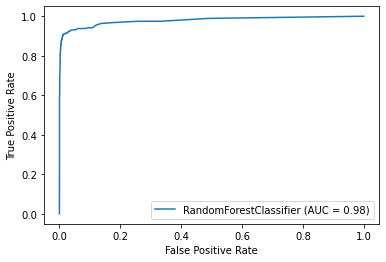

In [7]:
#Calculating scores before PCA and plotting the ROC Curve
acc = metrics.accuracy_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Metrics Before PCA:')
print(f'Accuracy: {acc}')
print(f'Recall: {rec}')
print(f'Precision: {prec}')
print(f'F1-Score: {f1}')
metrics.plot_roc_curve(clf, X_test, y_test)

In [8]:
#Using PCA to get the best 4 features
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=0)
# forest = RandomForestClassifier(n_estimators=216, criterion='entropy', random_state=0)
clf = forest.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Metrics After PCA:
Accuracy: 0.9776536312849162
Recall: 0.8138686131386861
Precision: 0.8849206349206349
F1-Score: 0.8479087452471482


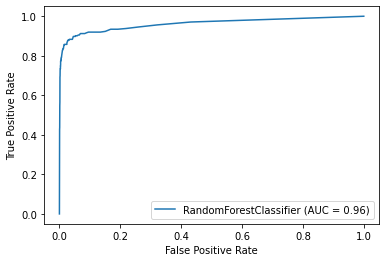

In [9]:
acc_ = metrics.accuracy_score(y_test, y_pred)
rec_ = metrics.recall_score(y_test, y_pred)
prec_ = metrics.precision_score(y_test, y_pred)
f1_ = metrics.f1_score(y_test, y_pred)
print('Metrics After PCA:')
print(f'Accuracy: {acc_}')
print(f'Recall: {rec_}')
print(f'Precision: {prec_}')
print(f'F1-Score: {f1_}')
metrics.plot_roc_curve(clf, X_test, y_test)

Feature ranking:
1. feature 2 (0.346977)
2. feature 3 (0.177641)
3. feature 0 (0.161336)
4. feature 5 (0.093913)
5. feature 4 (0.073190)
6. feature 7 (0.059870)
7. feature 1 (0.045025)
8. feature 6 (0.042048)


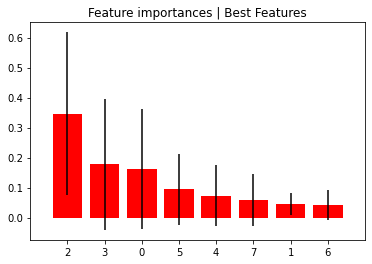

In [10]:
forest = RandomForestClassifier(n_estimators=159,criterion="entropy",
                              random_state=42)

forest.fit(X_, y)
#Impurity-Based importances
importances = forest.feature_importances_
normalized = (importances-min(importances))/(max(importances)-min(importances))
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances | Best Features")
plt.bar(range(X_.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_.shape[1]), indices)
plt.xlim([-1, X_.shape[1]])
plt.show()

Feature ranking:
1. feature 2 (0.131154)
2. feature 5 (0.014460)
3. feature 0 (0.011677)
4. feature 1 (0.009688)
5. feature 3 (0.009040)
6. feature 7 (0.009040)
7. feature 4 (0.008414)
8. feature 6 (0.008236)


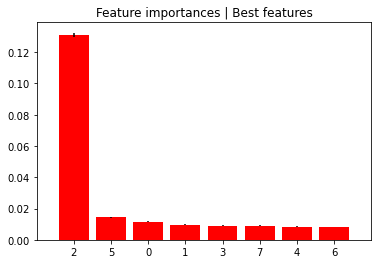

In [11]:
from sklearn.inspection import permutation_importance

#Permutation-Based importances
result = permutation_importance(forest, X_, y, scoring='neg_mean_squared_error')


importances = result.importances_mean
normalized_ = (importances-min(importances))/(max(importances)-min(importances))
std = result.importances_std
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances | Best features")
plt.bar(range(X_.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_.shape[1]), indices)
plt.xlim([-1, X_.shape[1]])
plt.show()

In [12]:
#Getting the best features from both methods
best_features = np.argsort(normalized+normalized_)[::-1][0:4]
print(f'Best Features: {best_features + 1}')

Best Features: [3 4 1 6]


Metrics After Permutation-Based/Impurity-Based Importances:
Accuracy: 0.9832402234636871
Recall: 0.843065693430657
Precision: 0.9314516129032258
F1-Score: 0.8850574712643678


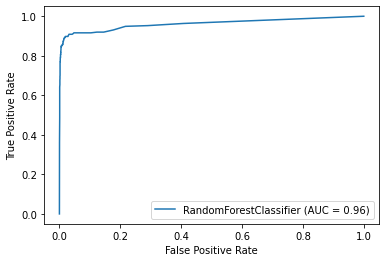

In [13]:
#Include only these features
X__ = X_[['feature3','feature1','feature4','feature6']]
X_train, X_test, y_train, y_test = train_test_split(X__, y, test_size = 0.2 ,random_state=0)
clf = forest.fit(X_train, y_train)
y_pred_ = clf.predict(X_test)

acc__ = metrics.accuracy_score(y_test, y_pred_)
rec__ = metrics.recall_score(y_test, y_pred_)
prec__ = metrics.precision_score(y_test, y_pred_)
f1__ = metrics.f1_score(y_test, y_pred_)
print('Metrics After Permutation-Based/Impurity-Based Importances:')
print(f'Accuracy: {acc__}')
print(f'Recall: {rec__}')
print(f'Precision: {prec__}')
print(f'F1-Score: {f1__}')
metrics.plot_roc_curve(clf, X_test, y_test)

In [14]:
print("Differences in metrics between all features and filtered features")
print(f'Accuracy: {acc-acc__}')
print(f'Recall: {rec-rec__}')
print(f'Precision: {prec-prec__}')
print(f'F1-Score: {f1-f1__}')
#Everything seems to be about he same except recall so it's better to use all the features
#OR keep another number of features instead of 4 and experiment further

Differences in metrics between all features and filtered features
Accuracy: 0.0013966480446927498
Recall: 0.018248175182481674
Precision: 0.0013547112074462353
F1-Score: 0.010578202359920574
